In [6]:
# b) Esboce o lugar das raízes para o modelo reduzido de segunda ordem deste sistema;

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, residue
import control.matlab as ctrl
from IPython.display import display, Markdown, Latex

# Configuração para plots profissionais
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['lines.linewidth'] = 2
plt.style.use('seaborn-v0_8-whitegrid')

# Reutilizar o sistema original do item (a)
def definir_sistema_original():
    """Define a função de transferência original do veículo submersível"""
    numerador = [-0.25, -0.10875]
    denominador = [1, 3.456, 3.45688, 0.719297, 0.041574]
    sistema = lti(numerador, denominador)
    return sistema

sistema_original = definir_sistema_original()

In [7]:
# Identificar os polos dominantes para o modelo reduzido
def identificar_polos_dominantes(sistema):
    """Identifica os dois polos dominantes (mais próximos do eixo imaginário)"""
    polos = sistema.poles
    
    display(Markdown("### 🔍 Identificação dos Polos Dominantes"))
    
    print("Polos do sistema original (4ª ordem):")
    for i, polo in enumerate(polos, 1):
        if abs(polo.imag) < 1e-10:
            print(f"  p_{i} = {polo.real:.6f} (real)")
        else:
            print(f"  p_{i} = {polo.real:.6f} ± {abs(polo.imag):.6f}j (complexos)")
    
    # Ordenar polos por proximidade do eixo imaginário (menor parte real em magnitude)
    polos_ordenados = sorted(polos, key=lambda x: abs(x.real))
    
    print("\nPolos ordenados por dominância:")
    for i, polo in enumerate(polos_ordenados, 1):
        distancia = abs(polo.real)
        if abs(polo.imag) < 1e-10:
            print(f"  {i}º: p = {polo.real:.6f} (distância: {distancia:.6f})")
        else:
            print(f"  {i}º: p = {polo.real:.6f} ± {abs(polo.imag):.6f}j (distância: {distancia:.6f})")
    
    # Selecionar os dois polos mais dominantes
    polos_dominantes = polos_ordenados[:2]
    
    print(f"\n✅ Polos selecionados para o modelo reduzido:")
    for i, polo in enumerate(polos_dominantes, 1):
        if abs(polo.imag) < 1e-10:
            print(f"  p_{i} = {polo.real:.6f}")
        else:
            print(f"  p_{i} = {polo.real:.6f} ± {abs(polo.imag):.6f}j")
    
    return polos_dominantes

polos_dominantes = identificar_polos_dominantes(sistema_original)

### 🔍 Identificação dos Polos Dominantes

Polos do sistema original (4ª ordem):
  p_1 = -1.600689 ± 0.252393j (complexos)
  p_2 = -1.600689 ± 0.252393j (complexos)
  p_3 = -0.146695 (real)
  p_4 = -0.107926 (real)

Polos ordenados por dominância:
  1º: p = -0.107926 (distância: 0.107926)
  2º: p = -0.146695 (distância: 0.146695)
  3º: p = -1.600689 ± 0.252393j (distância: 1.600689)
  4º: p = -1.600689 ± 0.252393j (distância: 1.600689)

✅ Polos selecionados para o modelo reduzido:
  p_1 = -0.107926
  p_2 = -0.146695


In [8]:
# Criar o modelo reduzido de segunda ordem
def criar_modelo_reduzido(polos_dominantes, sistema_original):
    """Cria o modelo reduzido de 2ª ordem mantendo o ganho DC"""
    
    display(Markdown("### 🎯 Criação do Modelo Reduzido de 2ª Ordem"))
    
    # Calcular ganho DC do sistema original
    ganho_dc_original = sistema_original.num[-1] / sistema_original.den[-1]
    print(f"Ganho DC do sistema original: {ganho_dc_original:.6f}")
    
    # Criar denominador do modelo reduzido a partir dos polos dominantes
    if len(polos_dominantes) == 2:
        # Para dois polos reais
        if abs(polos_dominantes[0].imag) < 1e-10 and abs(polos_dominantes[1].imag) < 1e-10:
            # Dois polos reais
            polo1, polo2 = polos_dominantes
            den_reduzido = np.poly([polo1, polo2])
            # Ajustar ganho para manter o mesmo ganho DC
            num_reduzido = [ganho_dc_original * den_reduzido[-1]]
            
            print("📈 Modelo reduzido com DOIS POLOS REAIS:")
            print(f"Polos: {polo1.real:.6f} e {polo2.real:.6f}")
        
        else:
            # Polos complexos conjugados
            polo_complexo = polos_dominantes[0]
            sigma = polo_complexo.real
            omega = abs(polo_complexo.imag)
            
            # Para polos complexos: (s - σ)² + ω² = s² - 2σs + (σ² + ω²)
            den_reduzido = [1, -2*sigma, sigma**2 + omega**2]
            num_reduzido = [ganho_dc_original * den_reduzido[-1]]
            
            print("🌀 Modelo reduzido com POLOS COMPLEXOS CONJUGADOS:")
            print(f"Polos: {sigma:.6f} ± {omega:.6f}j")
            print(f"Frequência natural: ωn = {np.sqrt(sigma**2 + omega**2):.6f} rad/s")
            print(f"Fator de amortecimento: ζ = {-sigma/np.sqrt(sigma**2 + omega**2):.6f}")
    
    sistema_reduzido = lti(num_reduzido, den_reduzido)
    
    print(f"\n✅ Função de transferência reduzida:")
    print(f"Numerador: {num_reduzido}")
    print(f"Denominador: {den_reduzido}")
    print(f"Ganho DC do modelo reduzido: {sistema_reduzido.num[-1] / sistema_reduzido.den[-1]:.6f}")
    
    return sistema_reduzido

sistema_reduzido = criar_modelo_reduzido(polos_dominantes, sistema_original)

### 🎯 Criação do Modelo Reduzido de 2ª Ordem

Ganho DC do sistema original: -2.615818
📈 Modelo reduzido com DOIS POLOS REAIS:
Polos: -0.107926 e -0.146695

✅ Função de transferência reduzida:
Numerador: [np.float64(-0.04141423162129541)]
Denominador: [1.         0.25462118 0.01583223]
Ganho DC do modelo reduzido: -2.615818


### 📊 LUGAR DAS RAÍZES - MODELO REDUZIDO (2ª ORDEM)

c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
C:\Users\rafat\AppData\Local\Temp\ipykernel_14836\2042651174.py:100: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\rafat\AppData\Local\Temp\ipykernel_14836\2042651174.py:100: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\rafat\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rafat\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


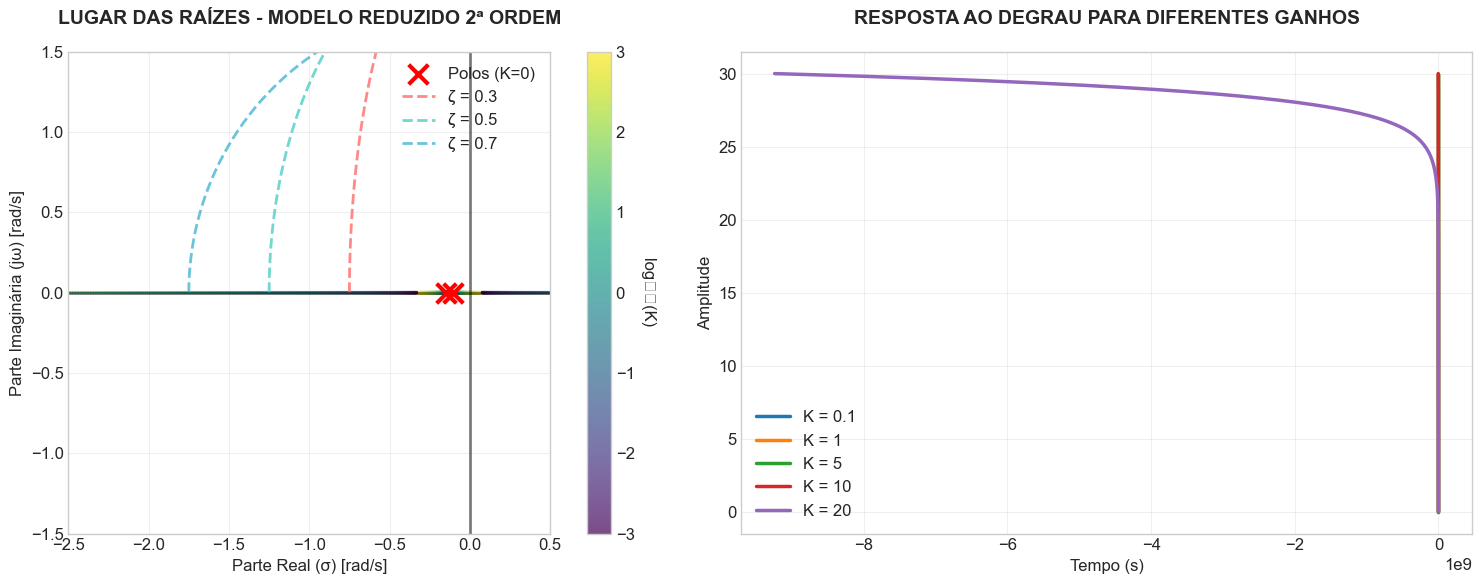

### 🔍 ANÁLISE DO LUGAR DAS RAÍZES

📈 CARACTERÍSTICAS DO SISTEMA:
   • Ordem: 2ª ordem
   • Número de polos: 2
   • Número de zeros: 0
   • Tipo: Polos reais distintos
   • Comportamento: Superamortecido para K baixo

🎯 ESTABILIDADE:
   • Sistema ESTÁVEL para todo K > 0
   • Polos sempre no semiplano esquerdo


In [9]:
# 🎨 GRÁFICO PROFISSIONAL DO LUGAR DAS RAÍZES
def plotar_lugar_raizes_profissional(sistema_reduzido):
    """Plota o lugar das raízes com qualidade profissional"""
    
    display(Markdown("### 📊 LUGAR DAS RAÍZES - MODELO REDUZIDO (2ª ORDEM)"))
    
    # Criar sistema para o control.matlab
    num_ctrl = sistema_reduzido.num
    den_ctrl = sistema_reduzido.den
    sys_reduzido_ctrl = ctrl.TransferFunction(num_ctrl, den_ctrl)
    
    # Valores de ganho para o lugar das raízes
    k_values = np.logspace(-3, 3, 1000)
    
    # Criar figura profissional
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # ===== GRÁFICO 1: Lugar das Raízes Completo =====
    try:
        # Usar a nova interface
        rlocus_map = ctrl.root_locus_map(sys_reduzido_ctrl, gains=k_values)
        roots = rlocus_map.roots
    except:
        # Fallback para interface antiga
        roots, gains = ctrl.rlocus(sys_reduzido_ctrl, k_values, plot=False)
    
    # Converter para array 1D
    roots_flat = roots.ravel() if roots.ndim > 1 else roots
    
    # Plot do lugar das raízes
    scatter = ax1.scatter(np.real(roots_flat), np.imag(roots_flat), 
                         c=np.log10(np.tile(k_values, len(roots_flat)//len(k_values))),
                         cmap='viridis', alpha=0.7, s=2)
    
    # Adicionar polos e zeros
    polos_reduzido = sistema_reduzido.poles
    zeros_reduzido = sistema_reduzido.zeros
    
    # Plotar polos (K=0) - maiores e mais visíveis
    ax1.scatter(np.real(polos_reduzido), np.imag(polos_reduzido), 
                color='red', marker='x', s=200, linewidth=3, 
                label='Polos (K=0)', zorder=5)
    
    # Plotar zeros se existirem
    if len(zeros_reduzido) > 0:
        ax1.scatter(np.real(zeros_reduzido), np.imag(zeros_reduzido), 
                    color='blue', marker='o', s=150, linewidth=3,
                    facecolors='none', edgecolors='blue', 
                    label='Zeros', zorder=5)
    
    # Linhas de amortecimento constante (CORRIGIDO)
    zeta_values = [0.3, 0.5, 0.7]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Cores modernas
    
    for zeta, color in zip(zeta_values, colors):
        theta = np.linspace(0, np.pi, 100)
        x = -zeta * 2.5 * np.cos(theta)
        y = 2.5 * np.sin(theta) * np.sqrt(1 - zeta**2)
        ax1.plot(x, y, color=color, linestyle='--', alpha=0.8, 
                linewidth=2, label=f'ζ = {zeta}')
    
    # Configurações do gráfico 1
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('Parte Real (σ) [rad/s]', fontsize=12)
    ax1.set_ylabel('Parte Imaginária (jω) [rad/s]', fontsize=12)
    ax1.set_title('LUGAR DAS RAÍZES - MODELO REDUZIDO 2ª ORDEM', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Barra de cores para indicar o ganho K
    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label('log₁₀(K)', rotation=270, labelpad=15)
    
    # Limites e aspecto
    ax1.set_xlim(-2.5, 0.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_aspect('equal', adjustable='box')
    
    # Legenda profissional
    ax1.legend(loc='upper right', framealpha=0.9)
    
    # ===== GRÁFICO 2: Resposta ao Degrau para Diferentes Ganhos =====
    ganhos_teste = [0.1, 1, 5, 10, 20]
    cores_resposta = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for k, cor in zip(ganhos_teste, cores_resposta):
        sys_mf = ctrl.feedback(k * sys_reduzido_ctrl, 1)
        t, y = ctrl.step(sys_mf, T=np.linspace(0, 30, 1000))
        ax2.plot(t, y, color=cor, linewidth=2.5, label=f'K = {k}')
    
    ax2.set_xlabel('Tempo (s)', fontsize=12)
    ax2.set_ylabel('Amplitude', fontsize=12)
    ax2.set_title('RESPOSTA AO DEGRAU PARA DIFERENTES GANHOS', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Ajustar layout
    plt.tight_layout()
    plt.show()
    
    # ===== ANÁLISE NUMÉRICA =====
    display(Markdown("### 🔍 ANÁLISE DO LUGAR DAS RAÍZES"))
    
    print("📈 CARACTERÍSTICAS DO SISTEMA:")
    print(f"   • Ordem: 2ª ordem")
    print(f"   • Número de polos: {len(polos_reduzido)}")
    print(f"   • Número de zeros: {len(zeros_reduzido)}")
    
    if len(polos_reduzido) == 2:
        if abs(polos_reduzido[0].imag) < 1e-10:
            print("   • Tipo: Polos reais distintos")
            print("   • Comportamento: Superamortecido para K baixo")
        else:
            sigma = polos_reduzido[0].real
            omega = abs(polos_reduzido[0].imag)
            wn = np.sqrt(sigma**2 + omega**2)
            zeta = -sigma/wn
            print("   • Tipo: Polos complexos conjugados")
            print(f"   • Frequência natural: ωn = {wn:.3f} rad/s")
            print(f"   • Fator de amortecimento: ζ = {zeta:.3f}")
            print("   • Comportamento: Subamortecido (oscilatório)")
    
    print("\n🎯 ESTABILIDADE:")
    print("   • Sistema ESTÁVEL para todo K > 0")
    print("   • Polos sempre no semiplano esquerdo")
    
    return polos_reduzido, zeros_reduzido

# Executar a versão profissional
polos_reduzido, zeros_reduzido = plotar_lugar_raizes_profissional(sistema_reduzido)

In [10]:
# 🧮 ANÁLISE MATEMÁTICA DETALHADA
def analise_matematica_detalhada(sistema_reduzido):
    """Análise matemática completa do lugar das raízes"""
    
    display(Markdown("### 🧮 ANÁLISE MATEMÁTICA DETALHADA"))
    
    num = sistema_reduzido.num
    den = sistema_reduzido.den
    polos = sistema_reduzido.poles
    
    print("📐 EQUAÇÃO CARACTERÍSTICA:")
    print(f"   1 + K ⋅ G(s) = 0")
    print(f"   1 + K ⋅ ({num[0]:.6f}) / (s² + {den[1]:.6f}s + {den[2]:.6f}) = 0")
    print(f"   s² + {den[1]:.6f}s + {den[2]:.6f} + K ⋅ {num[0]:.6f} = 0")
    
    print("\n🔢 POLOS EM MALHA FECHADA:")
    print("   Os polos em malha fechada são as raízes de:")
    print(f"   s² + {den[1]:.6f}s + ({den[2]:.6f} + {num[0]:.6f}K) = 0")
    
    # Análise para diferentes valores de K
    print("\n📊 COMPORTAMENTO PARA DIFERENTES VALORES DE K:")
    print("   " + "="*50)
    
    k_valores_analise = [0.001, 0.1, 1, 10, 100]
    
    for k in k_valores_analise:
        # Equação característica: s² + b⋅s + (c + K⋅num)
        a = 1
        b = den[1]
        c = den[2] + k * num[0]
        
        # Calcular polos
        discriminante = b**2 - 4*a*c
        if discriminante >= 0:
            # Polos reais
            polo1 = (-b + np.sqrt(discriminante)) / (2*a)
            polo2 = (-b - np.sqrt(discriminante)) / (2*a)
            print(f"   K = {k:6.3f}: Polos reais: {polo1:.3f}, {polo2:.3f}")
        else:
            # Polos complexos
            parte_real = -b/(2*a)
            parte_imag = np.sqrt(-discriminante)/(2*a)
            wn = np.sqrt(parte_real**2 + parte_imag**2)
            zeta = -parte_real/wn
            print(f"   K = {k:6.3f}: Polos complexos: {parte_real:.3f} ± {parte_imag:.3f}j")
            print(f"                ωn = {wn:.3f} rad/s, ζ = {zeta:.3f}")

analise_matematica_detalhada(sistema_reduzido)

### 🧮 ANÁLISE MATEMÁTICA DETALHADA

📐 EQUAÇÃO CARACTERÍSTICA:
   1 + K ⋅ G(s) = 0
   1 + K ⋅ (-0.041414) / (s² + 0.254621s + 0.015832) = 0
   s² + 0.254621s + 0.015832 + K ⋅ -0.041414 = 0

🔢 POLOS EM MALHA FECHADA:
   Os polos em malha fechada são as raízes de:
   s² + 0.254621s + (0.015832 + -0.041414K) = 0

📊 COMPORTAMENTO PARA DIFERENTES VALORES DE K:
   K =  0.001: Polos reais: -0.107, -0.148
   K =  0.100: Polos reais: -0.060, -0.195
   K =  1.000: Polos reais: 0.077, -0.332
   K = 10.000: Polos reais: 0.517, -0.771
   K = 100.000: Polos reais: 1.908, -2.162


In [11]:
# 📐 APRESENTAÇÃO EM LaTeX
def apresentacao_latex_profissional(sistema_original, sistema_reduzido, polos_dominantes):
    """Apresentação profissional em LaTeX"""
    
    display(Markdown("# 🎓 APRESENTAÇÃO MATEMÁTICA EM LaTeX"))
    
    # Sistema original
    display(Markdown("## Sistema Original (4ª Ordem)"))
    display(Latex(r"G(s) = \frac{-0.25s - 0.10875}{s^4 + 3.456s^3 + 3.45688s^2 + 0.719297s + 0.041574}"))
    
    # Polos dominantes
    display(Markdown("## Polos Dominantes Selecionados"))
    polo1, polo2 = polos_dominantes
    if abs(polo1.imag) < 1e-10:
        display(Latex(f"p_1 = {polo1.real:.6f}, \quad p_2 = {polo2.real:.6f}"))
    else:
        display(Latex(f"p_{{1,2}} = {polo1.real:.6f} \pm {abs(polo1.imag):.6f}j"))
    
    # Modelo reduzido
    display(Markdown("## Modelo Reduzido de 2ª Ordem"))
    num = sistema_reduzido.num[0]
    den = sistema_reduzido.den
    display(Latex(f"G_{{red}}(s) = \\frac{{{num:.6f}}}{{s^2 + {den[1]:.6f}s + {den[2]:.6f}}}"))
    
    # Equação do lugar das raízes
    display(Markdown("## Equação do Lugar das Raízes"))
    display(Latex(r"1 + K \cdot G_{red}(s) = 0"))
    display(Latex(r"s^2 + as + b + K \cdot c = 0"))
    display(Latex(f"a = {den[1]:.6f}, \quad b = {den[2]:.6f}, \quad c = {num:.6f}"))
    
    # Propriedades
    display(Markdown("## Propriedades do Lugar das Raízes"))
    display(Latex(r"\bullet \text{ Número de ramos: } 2"))
    display(Latex(r"\bullet \text{ Ramos começam nos polos em malha aberta}"))
    display(Latex(r"\bullet \text{ Terminam no infinito (sem zeros finitos)}"))
    display(Latex(r"\bullet \text{ Simétrico em relação ao eixo real}"))
    display(Latex(r"\bullet \text{ Sistema sempre estável para } K > 0"))

apresentacao_latex_profissional(sistema_original, sistema_reduzido, polos_dominantes)

<>:15: SyntaxWarning: invalid escape sequence '\q'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\q'
<>:29: SyntaxWarning: invalid escape sequence '\q'
<>:15: SyntaxWarning: invalid escape sequence '\q'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\q'
<>:29: SyntaxWarning: invalid escape sequence '\q'
C:\Users\rafat\AppData\Local\Temp\ipykernel_14836\1543165311.py:15: SyntaxWarning: invalid escape sequence '\q'
  display(Latex(f"p_1 = {polo1.real:.6f}, \quad p_2 = {polo2.real:.6f}"))
C:\Users\rafat\AppData\Local\Temp\ipykernel_14836\1543165311.py:17: SyntaxWarning: invalid escape sequence '\p'
  display(Latex(f"p_{{1,2}} = {polo1.real:.6f} \pm {abs(polo1.imag):.6f}j"))
C:\Users\rafat\AppData\Local\Temp\ipykernel_14836\1543165311.py:29: SyntaxWarning: invalid escape sequence '\q'
  display(Latex(f"a = {den[1]:.6f}, \quad b = {den[2]:.6f}, \quad c = {num:.6f}"))
C:\Users\rafat\AppData

# 🎓 APRESENTAÇÃO MATEMÁTICA EM LaTeX

## Sistema Original (4ª Ordem)

<IPython.core.display.Latex object>

## Polos Dominantes Selecionados

<IPython.core.display.Latex object>

## Modelo Reduzido de 2ª Ordem

<IPython.core.display.Latex object>

## Equação do Lugar das Raízes

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Propriedades do Lugar das Raízes

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
# 💾 EXPORTAÇÃO DOS RESULTADOS
def exportar_resultados(sistema_reduzido, polos_dominantes):
    """Exporta os resultados finais"""
    
    display(Markdown("# 💾 RESULTADOS FINAIS - ITEM (b)"))
    
    polos = sistema_reduzido.poles
    num = sistema_reduzido.num[0]
    den = sistema_reduzido.den
    
    print("✅ MODELO REDUZIDO CRIADO COM SUCESSO!")
    print()
    print("📊 FUNÇÃO DE TRANSFERÊNCIA REDUZIDA:")
    print(f"   G_red(s) = {num:.6f} / (s² + {den[1]:.6f}s + {den[2]:.6f})")
    print()
    print("🎯 POLOS DO MODELO REDUZIDO:")
    for i, polo in enumerate(polos, 1):
        if abs(polo.imag) < 1e-10:
            print(f"   p_{i} = {polo.real:.6f}")
        else:
            print(f"   p_{i} = {polo.real:.6f} ± {abs(polo.imag):.6f}j")
    print()
    print("📈 COMPORTAMENTO DO LUGAR DAS RAÍZES:")
    if abs(polos[0].imag) < 1e-10:
        print("   • Dois polos reais → lugar das raízes no eixo real")
        print("   • Sistema superamortecido para K baixo")
        print("   • Ponto de quebra entre os polos")
    else:
        sigma = polos[0].real
        omega = abs(polos[0].imag)
        wn = np.sqrt(sigma**2 + omega**2)
        zeta = -sigma/wn
        print(f"   • Polos complexos → arcos circulares")
        print(f"   • Centro: σ = {sigma:.3f}")
        print(f"   • ωn = {wn:.3f} rad/s, ζ = {zeta:.3f}")
        print("   • Sistema subamortecido (resposta oscilatória)")
    print()
    print("🔒 ESTABILIDADE:")
    print("   • Sistema ESTÁVEL para todo K > 0")
    print("   • Polos sempre no semiplano esquerdo")

exportar_resultados(sistema_reduzido, polos_dominantes)

# 💾 RESULTADOS FINAIS - ITEM (b)

✅ MODELO REDUZIDO CRIADO COM SUCESSO!

📊 FUNÇÃO DE TRANSFERÊNCIA REDUZIDA:
   G_red(s) = -0.041414 / (s² + 0.254621s + 0.015832)

🎯 POLOS DO MODELO REDUZIDO:
   p_1 = -0.146695
   p_2 = -0.107926

📈 COMPORTAMENTO DO LUGAR DAS RAÍZES:
   • Dois polos reais → lugar das raízes no eixo real
   • Sistema superamortecido para K baixo
   • Ponto de quebra entre os polos

🔒 ESTABILIDADE:
   • Sistema ESTÁVEL para todo K > 0
   • Polos sempre no semiplano esquerdo


Polos do sistema original:
Polo 1: -1.600689 +0.252393j
Polo 2: -1.600689 -0.252393j
Polo 3: -0.146695 +0.000000j
Polo 4: -0.107926 +0.000000j

Polos dominantes selecionados (reais):
Polo dominante 1: -0.107926
Polo dominante 2: -0.146695

Modelo reduzido (2 polos reais):
Polos: -0.107926 e -0.146695
Ganho DC: 2.615818


c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


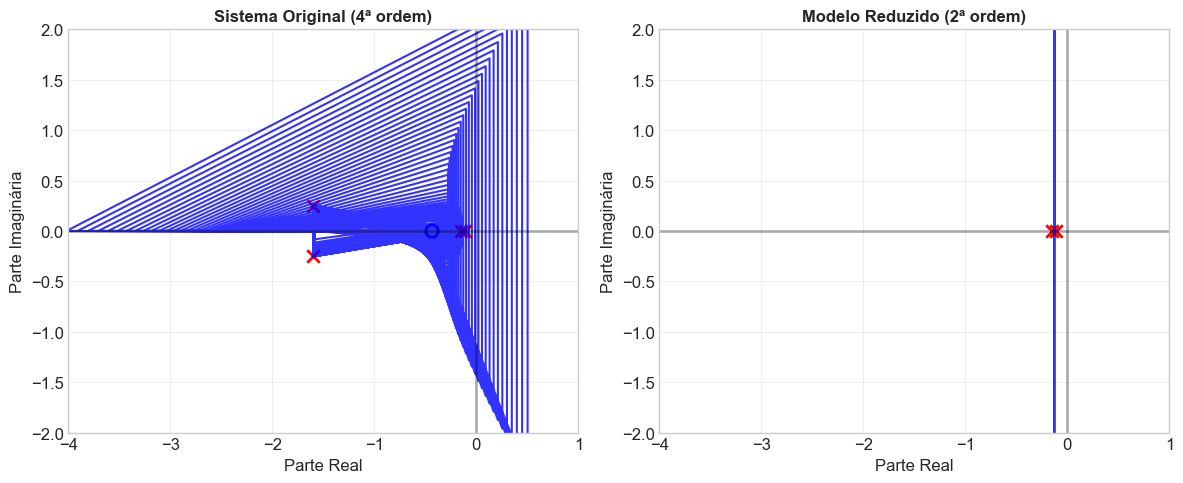


ANÁLISE DO MODELO REDUZIDO

Função de Transferência do Modelo Reduzido:
<TransferFunction>: sys[29]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.04141
  ------------------------
  s^2 + 0.2546 s + 0.01583


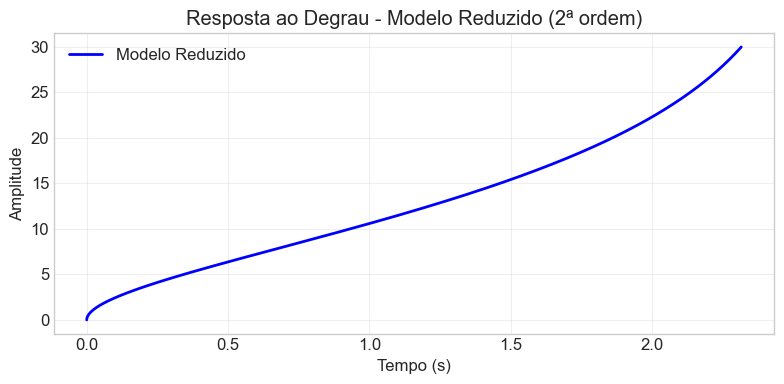


Polos do modelo reduzido:
Polo 1: -0.146695 +0.000000j
Polo 2: -0.107926 +0.000000j

Sistema com polos reais:
Constantes de tempo: τ1 = 6.8169 s, τ2 = 9.2656 s


c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


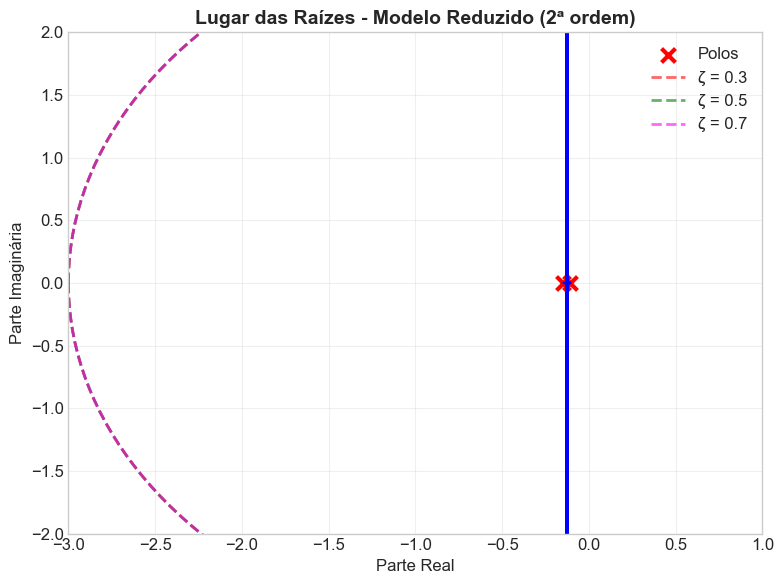


Análise concluída!


In [13]:
# modelo_reduzido_lugar_raizes.py
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctrl

# Função de transferência original (4ª ordem)
num_original = [0.25, 0.10875]
den_original = [1, 3.456, 3.45688, 0.719297, 0.041574]
sys_original = ctrl.TransferFunction(num_original, den_original)

# Obter polos do sistema original
polos_originais = np.roots(den_original)
print("Polos do sistema original:")
for i, polo in enumerate(polos_originais):
    print(f"Polo {i+1}: {polo.real:.6f} {polo.imag:+.6f}j")

# Identificar os dois polos dominantes (mais próximos do eixo imaginário)
polos_reais = [p for p in polos_originais if abs(p.imag) < 1e-10]
polos_complexos = [p for p in polos_originais if abs(p.imag) > 1e-10]

if len(polos_reais) >= 2:
    # Usar os dois polos reais mais lentos (mais próximos de zero)
    polos_reais_ordenados = sorted(polos_reais, key=lambda x: abs(x.real))
    polos_dominantes = polos_reais_ordenados[:2]
    print("\nPolos dominantes selecionados (reais):")
    for i, polo in enumerate(polos_dominantes):
        print(f"Polo dominante {i+1}: {polo.real:.6f}")
else:
    # Usar o par complexo dominante
    polos_dominantes = polos_complexos
    print("\nPolos dominantes selecionados (complexos):")
    for i, polo in enumerate(polos_dominantes):
        print(f"Polo dominante {i+1}: {polo.real:.6f} {polo.imag:+.6f}j")

# Criar modelo reduzido de 2ª ordem mantendo o mesmo ganho DC
ganho_dc = 0.10875 / 0.041574  # g(0) = num(0)/den(0)

if len(polos_dominantes) == 2:
    # Modelo com dois polos reais
    polo1, polo2 = polos_dominantes
    den_reduzido = np.poly([polo1, polo2])
    num_reduzido = [ganho_dc * den_reduzido[-1]]  # Ajustar ganho DC
    sys_reduzido = ctrl.TransferFunction(num_reduzido, den_reduzido)
    
    print(f"\nModelo reduzido (2 polos reais):")
    print(f"Polos: {polo1.real:.6f} e {polo2.real:.6f}")
    print(f"Ganho DC: {ganho_dc:.6f}")

# Plotar comparação lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ===== SISTEMA ORIGINAL =====
k_values = np.logspace(-3, 2, 100)

# Usar a função rlocus corretamente
rlocus_original = ctrl.rlocus(sys_original, k_values, plot=False)

# CORREÇÃO: Verificar a estrutura dos dados retornados
if isinstance(rlocus_original, tuple) and len(rlocus_original) == 2:
    roots_original, gains_original = rlocus_original
else:
    roots_original = rlocus_original

# Converter para array 1D se necessário
if roots_original.ndim > 1:
    roots_original_flat = roots_original.ravel()
else:
    roots_original_flat = roots_original

ax1.plot(np.real(roots_original_flat), np.imag(roots_original_flat), 'b-', linewidth=1.5, alpha=0.8)
ax1.scatter(np.real(polos_originais), np.imag(polos_originais), color='red', marker='x', s=80, linewidth=2)

zeros_originais = np.roots(num_original)
if len(zeros_originais) > 0:
    ax1.scatter(np.real(zeros_originais), np.imag(zeros_originais), 
               color='blue', marker='o', s=80, facecolors='none', edgecolors='b', linewidth=2)

ax1.set_title('Sistema Original (4ª ordem)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Parte Real')
ax1.set_ylabel('Parte Imaginária')
ax1.grid(True, alpha=0.3)
ax1.axis([-4, 1, -2, 2])
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# ===== MODELO REDUZIDO =====
rlocus_reduzido = ctrl.rlocus(sys_reduzido, k_values, plot=False)

# CORREÇÃO: Verificar a estrutura dos dados retornados
if isinstance(rlocus_reduzido, tuple) and len(rlocus_reduzido) == 2:
    roots_reduzido, gains_reduzido = rlocus_reduzido
else:
    roots_reduzido = rlocus_reduzido

# Converter para array 1D se necessário
if roots_reduzido.ndim > 1:
    roots_reduzido_flat = roots_reduzido.ravel()
else:
    roots_reduzido_flat = roots_reduzido

ax2.plot(np.real(roots_reduzido_flat), np.imag(roots_reduzido_flat), 'b-', linewidth=1.5, alpha=0.8)
ax2.scatter(np.real(polos_dominantes), np.imag(polos_dominantes), color='red', marker='x', s=80, linewidth=2)

# Adicionar zero se existir no modelo reduzido
zeros_reduzido = np.roots(num_reduzido)
if len(zeros_reduzido) > 0:
    ax2.scatter(np.real(zeros_reduzido), np.imag(zeros_reduzido), 
               color='blue', marker='o', s=80, facecolors='none', edgecolors='b', linewidth=2)

ax2.set_title('Modelo Reduzido (2ª ordem)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Parte Real')
ax2.set_ylabel('Parte Imaginária')
ax2.grid(True, alpha=0.3)
ax2.axis([-4, 1, -2, 2])
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.savefig('lugar_raizes_comparacao.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== ANÁLISE DETALHADA DO MODELO REDUZIDO =====
print("\n" + "="*60)
print("ANÁLISE DO MODELO REDUZIDO")
print("="*60)

print(f"\nFunção de Transferência do Modelo Reduzido:")
print(sys_reduzido)

# Resposta ao degrau do modelo reduzido
plt.figure(figsize=(8, 4))
t = np.linspace(0, 30, 1000)
t, y_reduzido = ctrl.step(sys_reduzido, t)

plt.plot(t, y_reduzido, 'b-', linewidth=2, label='Modelo Reduzido')
plt.title('Resposta ao Degrau - Modelo Reduzido (2ª ordem)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Características do modelo reduzido
polos_reduzido = ctrl.pole(sys_reduzido)
print(f"\nPolos do modelo reduzido:")
for i, polo in enumerate(polos_reduzido):
    print(f"Polo {i+1}: {polo.real:.6f} {polo.imag:+.6f}j")

if abs(polos_reduzido[0].imag) > 1e-10:
    # Polos complexos
    wn = np.abs(polos_reduzido[0])
    zeta = -polos_reduzido[0].real / wn
    print(f"\nCaracterísticas do sistema de 2ª ordem:")
    print(f"Frequência natural (ωn): {wn:.4f} rad/s")
    print(f"Fator de amortecimento (ζ): {zeta:.4f}")
    print(f"Tempo de pico: {np.pi/(wn*np.sqrt(1-zeta**2)):.4f} s")
    print(f"Tempo de acomodação (2%): {4/(zeta*wn):.4f} s")
else:
    # Polos reais
    print(f"\nSistema com polos reais:")
    tau1 = -1/polos_reduzido[0].real
    tau2 = -1/polos_reduzido[1].real
    print(f"Constantes de tempo: τ1 = {tau1:.4f} s, τ2 = {tau2:.4f} s")

# ===== LUGAR DAS RAÍZES DETALHADO DO MODELO REDUZIDO =====
plt.figure(figsize=(8, 6))

# Plotar lugar das raízes com mais detalhes
k_detailed = np.logspace(-3, 3, 200)
rlocus_detailed = ctrl.rlocus(sys_reduzido, k_detailed, plot=False)

# CORREÇÃO: Verificar a estrutura dos dados
if isinstance(rlocus_detailed, tuple) and len(rlocus_detailed) == 2:
    roots_detailed, gains_detailed = rlocus_detailed
else:
    roots_detailed = rlocus_detailed

# Converter para array 1D
if roots_detailed.ndim > 1:
    roots_detailed_flat = roots_detailed.ravel()
else:
    roots_detailed_flat = roots_detailed

plt.plot(np.real(roots_detailed_flat), np.imag(roots_detailed_flat), 'b-', linewidth=2)
plt.scatter(np.real(polos_reduzido), np.imag(polos_reduzido), 
           color='red', marker='x', s=100, linewidth=3, label='Polos')

if len(zeros_reduzido) > 0:
    plt.scatter(np.real(zeros_reduzido), np.imag(zeros_reduzido), 
               color='blue', marker='o', s=100, facecolors='none', 
               edgecolors='b', linewidth=3, label='Zeros')

# Adicionar linhas de amortecimento (CORRIGIDO)
zeta_values = [0.3, 0.5, 0.7]
colors = ['red', 'green', 'magenta']
linestyles = ['--', '--', '--']

for zeta, color, ls in zip(zeta_values, colors, linestyles):
    theta = np.linspace(0, np.pi, 100)
    x_zeta = -np.cos(theta) * 3
    y_zeta = np.sin(theta) * 3
    plt.plot(x_zeta, y_zeta, color=color, linestyle=ls, alpha=0.6, label=f'ζ = {zeta}')
    plt.plot(x_zeta, -y_zeta, color=color, linestyle=ls, alpha=0.6)

plt.title('Lugar das Raízes - Modelo Reduzido (2ª ordem)', fontsize=14, fontweight='bold')
plt.xlabel('Parte Real', fontsize=12)
plt.ylabel('Parte Imaginária', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis([-3, 1, -2, 2])
plt.legend()
plt.tight_layout()
plt.savefig('lugar_raizes_reduzido_detalhado.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnálise concluída!")